# OpenCV Introduction

Kevin J. Walchko
created 20 July 2017

---

We are going to start learning about image processing. To do that, we are using OpenCV, which is a standard computer vision library. We are also going to talk about color spaces and about other representations other than the classic RGB color model most people are familar with.

![](rgb-1.png)

 Although we are going to focus on OpenCV, there are other useful libraries out there:
 
 - [dlib:](http://dlib.net/) a machine learning toolbox that can help image recognition
 - [scikit-image:](http://scikit-image.org/) an image processing toolkit which is part of [SciPy](https://www.scipy.org/) or scientific python which aims to a Matlab replacement

## Objectives

- read and write images
- opencv image format
- how to convert between colorspaces
- access video streams from cameras and movies
- affine transformation

## References

- [OpenCV source code on github](https://github.com/opencv/opencv)
- [OpenCV 3.3 Docs](http://docs.opencv.org/3.3.0/)
- [OpenCV 3.3 Python Tutorials](http://docs.opencv.org/3.3.0/d6/d00/tutorial_py_root.html)
- [handee opencv tutorials](https://github.com/handee/opencv-gettingstarted)
- [Wikipedia color spaces](https://en.wikipedia.org/wiki/Color_space)
- [Wikipedia HSV color space](https://en.wikipedia.org/wiki/HSL_and_HSV)
- [List of color spaces and their uses](https://en.wikipedia.org/wiki/List_of_color_spaces_and_their_uses)
- [Website to understand RGB and HSV colors](http://colorizer.org/)
- [scikit-image](http://scikit-image.org/docs/dev/auto_examples/index.html)

## Setup

In [1]:
%matplotlib inline 

from __future__ import print_function
# these imports let you use opencv
import cv2          # opencv itself
import numpy as np  # matrix manipulations
from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks

In [2]:
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

# Read/Write an Image

## Read Image

`cv2.imread(filename[, flags]) = image`

- **filename** - Name of file to be loaded.
- **flags** - Flags specifying the color type of a loaded image:
    - CV_LOAD_IMAGE_ANYDEPTH - If set, return 16-bit/32-bit image when the input has the corresponding depth, otherwise convert it to 8-bit.
    - CV_LOAD_IMAGE_COLOR - If set, always convert image to the color one
    - CV_LOAD_IMAGE_GRAYSCALE - If set, always convert image to the grayscale one

You can also pass numbers for your flags:
- \>0 Return a 3-channel color image. Note In the current implementation the alpha channel, if any, is stripped from the output image. Use negative value if you need the alpha channel.
- =0 Return a grayscale image.
- <0 Return the loaded image as is (with alpha channel).

OpenCV, using host libraries, is able to read/write:

- Windows bitmaps - *.bmp, *.dib (always supported)
- JPEG files - *.jpeg, *.jpg, *.jpe (see the Notes section)
- JPEG 2000 files - *.jp2 (see the Notes section)
- Portable Network Graphics - *.png (see the Notes section)
- Portable image format - *.pbm, *.pgm, *.ppm (always supported)
- Sun rasters - *.sr, *.ras (always supported)
- TIFF files - *.tiff, *.tif (see the Notes section)

Now we can open an image:

In [3]:
input_image_bgr=cv2.imread('droids.jpg')

Now python OpenCV stores an image as a `numpy` array of arrays. Basically, there is an array for red, blue, and green. However, OpenCV natively stores them in the order blue, green, and red or BGR. This was a historic decision made back when Intel created this library long ago.

![](numpy_array.png)

Each color channel has its own array with a width and height and the number of channels is called the depth. A color image has a depth of 3 while a grayscale image has a depth of 1.

We can find out various things about that image

In [4]:
print('Image size is height*width*depth:', input_image_bgr.size)

Image size is height*width*depth: 2420736


In [5]:
# you can also think about this as rows, columns, depth
print('Image shape is (height, width, depth):', input_image_bgr.shape)

Image shape is (height, width, depth): (788, 1024, 3)


In [6]:
# images are typically unsigned 8b integers ranging from 0 to 255
print(input_image_bgr.dtype)

uint8


**gotcha** that last one (datatype) is one of the tricky things about working in Python. As it's not strongly typed, Python will allow you to have arrays of different types but the same size, and some functions will return arrays of types that you probably don't want. Being able to check and inspect the datatype like this is very useful and is one of the things I often find myself doing in debugging.

## Writing an Image

`cv2.imwrite(filename, img[, params])`

OpenCV will look at the extention on the file name and save it accordingly (ex. `picture.jpg` saves as JPEG image). Different formats (i.e., PNG, JPEG, TIFF, etc) have different parameters you can pass to do cool things. On average, you don't need them, especially if you are saving to PNG or JPEG.

## Displaying an Image in Jupyter

The line above in setup (`from matplotlib import pyplot as plt`) gives us access to a lot of plotting routines. These are similar to the Matlab routines, but not exactly.

- plt.imshow(*image*): displays an image
- plt.subplot(*rows*, *columns*, *image number*): makes an array of images
- plt.title(*string*): puts a title
- plt.grid(*True or False*): turns on/off the grid

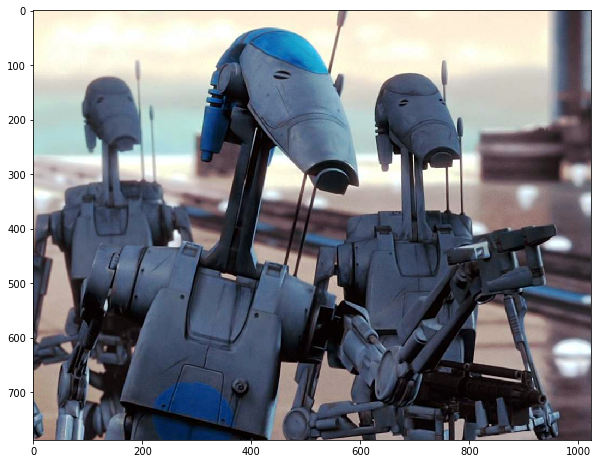

In [7]:
plt.imshow(input_image_bgr);

Again, what this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

## Converting between color spaces, merging and splitting channels

We can convert between various colorspaces in OpenCV easily.

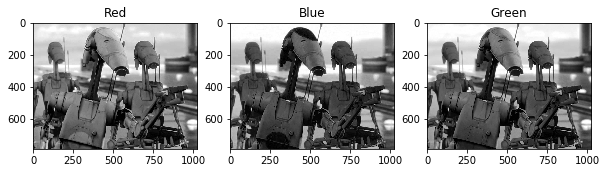

In [8]:
# split color channels out channels
b,g,r=cv2.split(input_image_bgr)

# show each of the channels
plt.subplot(1,3,1)
plt.imshow(r, cmap='gray');
plt.title('Red')

plt.subplot(1,3,2)
plt.imshow(b, cmap='gray');
plt.title('Blue')

plt.subplot(1,3,3)
plt.imshow(g, cmap='gray');
plt.title('Green');

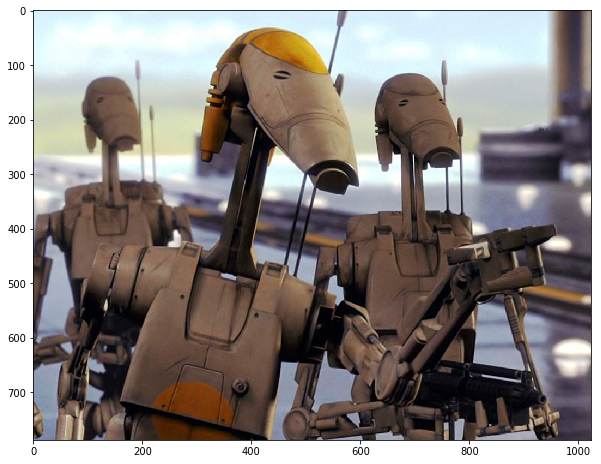

In [9]:
# now let's merge the seperate channels back together
# and get a good color RGB image
merged=cv2.merge([r,g,b])

# merge takes an array of single channel matrices
plt.imshow(merged);

OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value color space. [OpenCV documents](http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html) have more information on how these color conversions are done. 

In [10]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print('There are:', len(COLORflags),'for you to choose from when switching between different colorspaces')
print('')
print('Here are the flags you can choose from:')
print(COLORflags)

There are: 287 for you to choose from when switching between different colorspaces

Here are the flags you can choose from:
['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_COOL', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_JET', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG'

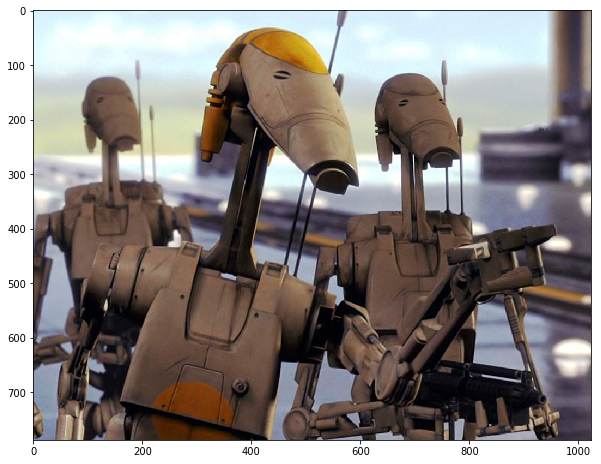

In [11]:
input_image=cv2.cvtColor(input_image_bgr, cv2.COLOR_BGR2RGB)

# yeah, this look right!
plt.imshow(input_image);

## Other Colorspaces Besides RGB/BGR

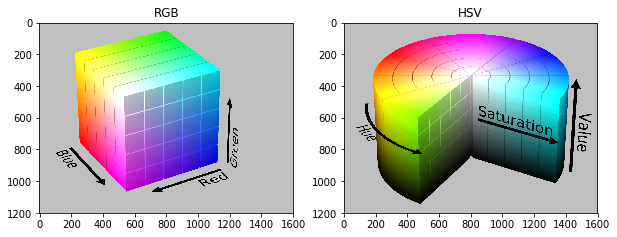

In [12]:
a = cv2.imread('rgb.png')
a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
b = cv2.imread('hsv.png')
b = cv2.cvtColor(b, cv2.COLOR_BGR2RGB)

# example of subplot and nice way to show images side by side
plt.subplot(1,2,1)
plt.imshow(a)
plt.title('RGB')
plt.subplot(1,2,2)
plt.imshow(b)
plt.title('HSV');

HSL and HSV are the two most common cylindrical-coordinate representations of points in an RGB color model. The two representations rearrange the geometry of RGB in an attempt to be more intuitive and perceptually relevant than the cartesian (cube) representation. Developed in the 1970s for computer graphics applications, HSL and HSV are used today in color pickers and in image editing software.

HSV is a cylindrical geometry, with hue, as the angular dimension, starting at the red primary at 0°, passing through the green primary at 120° and the blue primary at 240°, and then wrapping back to red at 360°. In each geometry, the central vertical axis comprises the neutral, achromatic, or gray colors, ranging from black at 0, the bottom, to white at  255, the top.

| Color Space | Use |
|:------------|:----|
| RGB | RGB (Red, Green, Blue) describes what kind of light needs to be emitted to produce a given color. RGB stores individual values for red, green and blue. RGB is not a color space, it is a color model. There are many different RGB color spaces derived from this color model. |
| HSV | HSV (hue, saturation, value) uses one change to describe color, making it easier to understand and transitions between colors. It is also used in robotics (color detection) and color selection tools in image processing. |
| LAB | Perceptually uniform color space which approximates how we perceive color. One of the most important attributes of the Lab model is device independence. This means that the colors are defined independent of their nature of creation or the device they are displayed on. Used extensively in Adobe Photoshop.|

### HSV

This is commonly used in robotics because it is computationally simple (fast).

- **Hue [0-180]:** is linked to the color and it is possible to smoothly transition from one color to any other color linearly. *Note* that opencv has chosen hue to only go as far as 180 instead of 360 degrees which is a little more common
- **Saturation [0-255]:** purity/shades of the color, is how bright the color is and ranges from white to the pure color
- **Value [0-255]:** intensity, is how bright the color is and ranges from black to the pure color

### LAB

LAB and some of the other spaces are not as computationally efficient, but for certain applications are better than HSV. However, as processing power increases and performance/watt increases, this will become a moot point.

- **Lightness:** intensity
- **a:** color component ranging from Green to Magenta
- **b:** color component ranging from Blue to Yellow

Honestly, we will focus on RGB and HSV so understand those. The other hundreds of colorspaces are just an FYI. 

## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimized for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [13]:
pixel = input_image[100,100]
print(pixel)

[228 246 250]


In [14]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


## Matrix slicing
In OpenCV python style, as I have mentioned, images are numpy arrays. There are some superb array manipulation in numpy tutorials out there: this is a great introduction if you've not done it before [http://www.scipy-lectures.org/intro/numpy/numpy.html#indexing-and-slicing]. You can do things like this:

![](numpy-indexing.png)

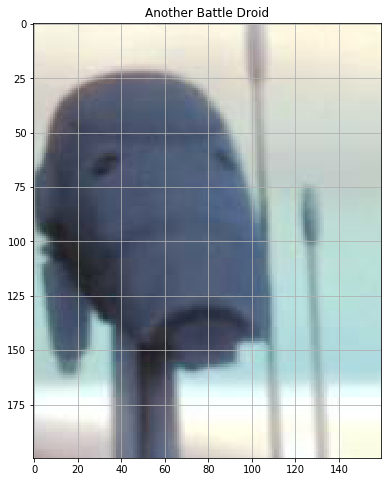

In [23]:
freshim2 = cv2.imread("droids.jpg")
crop = freshim2[100:300, 90:250] 
plt.imshow(crop);
plt.title('Another Battle Droid');
plt.grid(True);  # why did I put the grid lines on ... why not?

The key thing to note here is that the slicing works like
```
image[y:y+height, x:x+width]
```

You can also use slicing to separate out channels.  In this case you want 
```
image[y:y+height, x:x+width, channel]
```
where channel represents the color you're interested in - this could be 0 = blue, 1 = green or 2=red if you're dealing with a default OpenCV image, but if you've got an image that has been converted it could be something else like gray scale or HSV.

## Getting and Setting Regions of Interest (ROI) in an Image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to access a subsection of your image to work on. In a lot of the OpenCV documentation, this is referred to as Region of Interest (ROI).

    input_image[y0:y1, x0:x1]

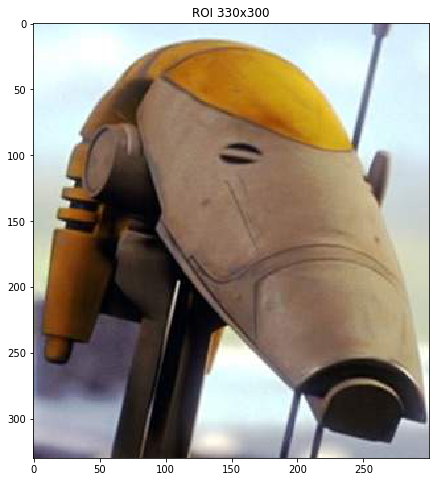

In [17]:
# this is essentially cropping an image
roi = input_image[20:350, 300:600]
plt.imshow(roi);
plt.title('ROI {}x{}'.format(roi.shape[0], roi.shape[1]));

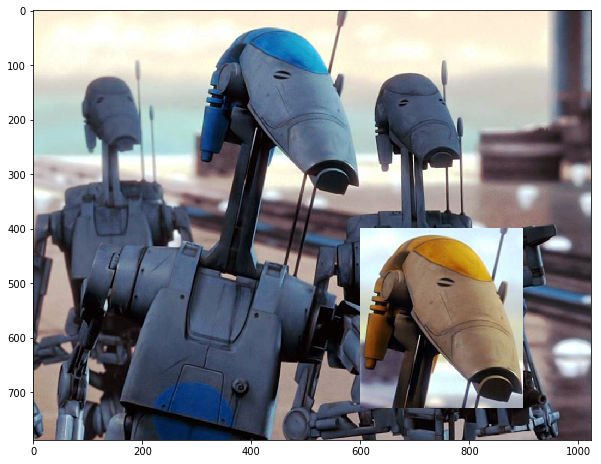

In [18]:
# grab a new copy
fresh_image=cv2.imread('droids.jpg') # note, we won't fix the color for this one

# paste the cropped/roi image over the fresh copy
# basically, you are setting a sub matrix of data equal to the roi
fresh_image[400:400+roi.shape[0], 600:600+roi.shape[1]]=roi
plt.imshow(fresh_image);

## Affine Transforms

In geometry, an affine transformation is a function between affine spaces which preserves points, straight lines and planes. Also, sets of parallel lines remain parallel after an affine transformation. An affine transformation does not necessarily preserve angles between lines or distances between points, though it does preserve ratios of distances between points lying on a straight line.

Examples of affine transformations include translation, scaling, homothety, similarity transformation, reflection, rotation, shear mapping, and compositions of them in any combination and sequence.

$$
affine = \begin{bmatrix}
  R_{2x2} & t_{2x1} \\
  skew & 1
\end{bmatrix}
$$

This matrix should look familar from when we discussed homogeneous transforms. This is just in 2D and not in 3D like before.

![](affine.png)

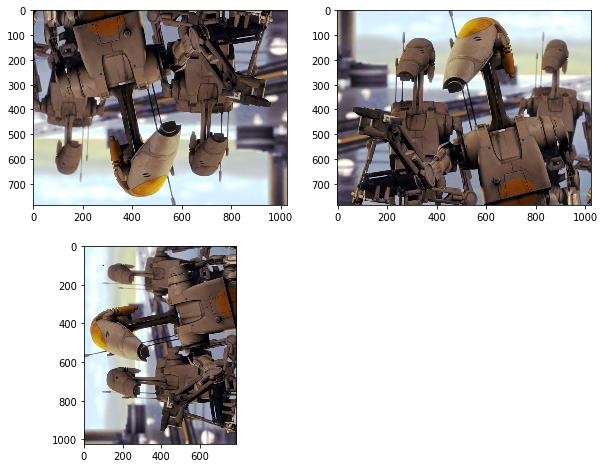

In [19]:
plt.subplot(2,2,1)
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0);

plt.subplot(2,2,2)
flipped_code_1=cv2.flip(input_image,1) # horizontal flip or mirror image
plt.imshow(flipped_code_1);

plt.subplot(2,2,3)
transposed=cv2.transpose(input_image) # effectively a rotation, this just swaps row/columns
plt.imshow(transposed);

Alternatively, you can use the `rot90` from `numpy`

```
rot90(m, k=1, axes=(0, 1))
    Rotate an array by 90 degrees in the plane specified by axes.
    
    Rotation direction is from the first towards the second axis.
    
    Parameters
    ----------
    m : array_like
        Array of two or more dimensions.
    k : integer
        Number of times the array is rotated by 90 degrees.
    axes: (2,) array_like
        The array is rotated in the plane defined by the axes.
        Axes must be different.
    
    Returns
    -------
    y : ndarray
        A rotated view of `m`.
```

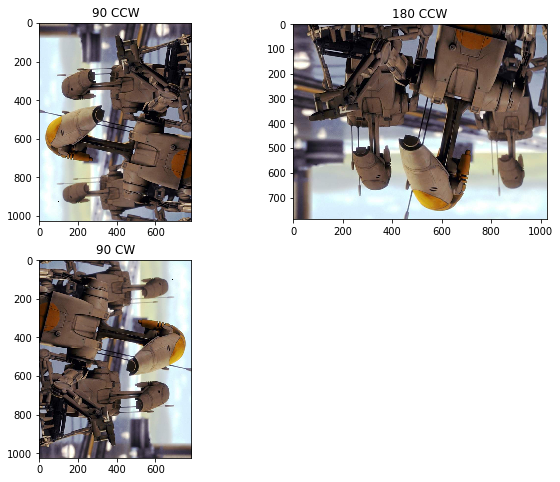

In [20]:
from numpy import rot90

plt.subplot(2,2,1)
r0=rot90(input_image) # rotate 90 CCW
plt.imshow(r0);
plt.title('90 CCW')

plt.subplot(2,2,2)
r1=rot90(input_image, k=2) # rotate 180 CCW
plt.imshow(r1)
plt.title('180 CCW');

plt.subplot(2,2,3)
r2=rot90(input_image, k=-1) # rotate 90 CW
plt.imshow(r2)
plt.title('90 CW');

# Other Useful OpenCV Functions

The reality is, OpenCV is so big and powerful, even if we devoted the entire class to computer vision, we couldn't cover everything. I encourge you to look around and see what else you can do with OpenCV.

However, a few other functions for drawing things on images are listed here:

```python
# draw a red rectangle
# rectangle(image, top-left-corner, bottom-right-corner, color, thickness)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Draw a diagonal blue line with thickness of 5 px
# line(image, start, stop, color, thickness)
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

# draw a circle
# circle(image, center, radius, color, thickness)
img = cv2.circle(img,(447,63), 63, (0,0,255), 1)

# draw a solid circle with line thickness = -1
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

# draw text on an image
# putText(image,text,location, font,size,color,thickness,cv2.LINE_AA)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'Hello',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)
```

# Using OpenCV in Python CLI

So Jupyter is pretty cool and does a lot of great things. However, it doesn't display live camera feeds well, especially if you are trying to manipulate them in real-time. So, in order to edit and display video feeds from your laptop's camera in real-time we need to run python from the command line.

```python
#!/usr/bin/env python

from __future__ import division, print_function
import cv2
import time

if __name__ == "__main__":
    # we want to capture the default camera: 0
    # if we had other cameras attached on USB ports, we could
    # pass in 1, 2, 3, etc to pick which one
    cam = cv2.VideoCapture(0)
    
    # loop forever
    while True:
        # reading the camera returns 2 things:
        #    good: was the image successfully captured - True/False
        #    img: if successful, then img is a good/valid image
        good, img = cam.read()
        if good:
            cv2.imshow('window title', img)  # you can name the 
                                             # window anything
            key = cv2.waitKey(10)  # wait 10 ms. If you put 0, then
                                   # it will wait forever for a 
                                   # key press. 
            if key == ord('q'):
                break  # q = quit, break out of loop
        time.sleep(0.03)  # sleep for a little
    
    cam.release()  # close camera
    cv2.destroyAllWindows() # clean up GUI
```

Unfortunately you can't run this in `jupyter`, you have to create a text file and copy it into the file, then run it. Also to play a move in python from the command line, you can do:

```python
#!/usr/bin/env python

import cv2
import time

if __name__ == '__main__' :
    # read from a movie, mp4
    # note this really is the same as above, we just give it a file name to read
    video = cv2.VideoCapture("Megamind.mp4")

    while True:
        ok, frame = video.read()
        if ok:
            cv2.imshow('movie', frame)
            k = cv2.waitKey(1)
            if k == ord('q'):
                exit()
            time.sleep(0.033)

        else:
            break
```

# Grabbing Video on a Raspberry Pi

In OpenCV, `cv2.VideoCapture()` command works great on systems where the camera is attached to USB. FYI, the camera built into your laptop is also attached to USB internally. **However**, on the Pi, the camera is attached to a camera bus (like on most cell phones) and the default camera setup generally doesn't work.

Later, when we do image processing on the roomba, you will need to capture video/images like this:

```python
#!/usr/bin/env python

from __future__ import division, print_function
import cv2
import time
from opencvutils import Camera  # we will use this to capture video/images

if __name__ == "__main__":
    # You only need this on the raspberry pi
    cam = Camera(cam='pi')
    cam.init(win=(640,480))
    
    # loop forever
    while True:
        # reading the camera returns 2 things:
        #    good: was the image successfully captured - True/False
        #    img: if successful, then img is a good/valid image
        good, img = cam.read()
        if good:
            # do something with the image
            somethingCool(img)
```

# Videos

We can play a movie in a notebook by inserting a little html code and read an mpeg4 file.

In [21]:
# to play an mpeg4 video, you can do this:
from IPython.display import HTML # need this for embedding a movie in an iframe
HTML('<iframe src="Megamind.mp4" width="640" height="360" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>')

We can also save image frames from a camera to an mpeg4 file:

```python
# simple function to save a video
import platform
def videoWrite(frames, fname='out.mp4'):
    frame_height, frame_width, _ = frames[0].shape
    
    # pick a good encoder for the current OS
    sys = platform.system()
    if sys in ['Darwin']:  # this is on macOS
        fourcc = 'avc1'
    else:  # this is for Windoze
        fourcc = 'mjpg'
        
    out = cv2.VideoWriter(
        fname,
        cv2.VideoWriter_fourcc(*fourcc), 
        30, 
        (frame_width,frame_height))
    for frame in frames:
        out.write(frame)
    out.release()
```

Don't worry about Linux, we are doing to do something different when saving video files.

# Bonus

I put this here because I think it makes the most sense, but it really is for the bonus part of Lab 3 ... so you can ignore it if you want. But you could turn this into a function and add it to what we need to do for Lab 3 and get some extra points!

Bascially, what we are going to do is super impose a hat onto a person. Later we will do face detection and do this automatically, but for now, I just eyeballed the hat location.

1. Read in the 2 images
1. Declare a region of interest (roi) where we will place the hat
1. Do some image processing to create a mask of the hat (*note:* we haven't talked about thresholding yet)
    1. The mask will cut out a hole in the rogue one image where we will place the hat
    1. The mask will also allow us to get rid of everything in the hat image that is not hat
1. Then we will add the hat image and the rogue one image together to create the final image
    1. Notice we are working with the roi the whole time which is a pointer to a subsection of the rogue one image

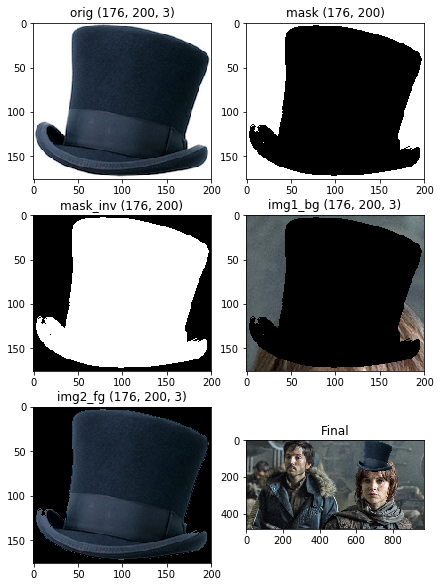

In [6]:
pic = cv2.imread('rogue-one.jpg')
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

hat = cv2.imread('top.jpg', 1)
hat = cv2.cvtColor(hat, cv2.COLOR_BGR2RGB)

h,w = hat.shape[:2]
y,x = 0,600
roi = pic[y:y+h,x:x+w]

# create mask
gray = cv2.cvtColor(hat,cv2.COLOR_RGB2GRAY)
ret, mask = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of hat in ROI
# essentially, cut out where the hat goes in the image
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of hat from logo image.
# essentially, remove the unwanted background and leave only the hat
img2_fg = cv2.bitwise_and(hat,hat,mask = mask_inv)

# Put hat in ROI and modify the main image
# returns a new result image, so pass the roi as the destination
dst = cv2.add(img1_bg,img2_fg, roi)

pylab.rcParams['figure.figsize'] = (7.0, 10.0)

plt.subplot(3,2,1)
plt.imshow(hat)
plt.title('orig {}'.format(hat.shape))

plt.subplot(3,2,2)
plt.imshow(mask, cmap='gray')
plt.title('mask {}'.format(mask.shape))

plt.subplot(3,2,3)
plt.imshow(mask_inv, cmap='gray')
plt.title('mask_inv {}'.format(mask_inv.shape))

plt.subplot(3,2,4)
plt.imshow(img1_bg)
plt.title('img1_bg {}'.format(img1_bg.shape))

plt.subplot(3,2,5)
plt.imshow(img2_fg)
plt.title('img2_fg {}'.format(img2_fg.shape))

plt.subplot(3,2,6)
plt.imshow(pic)
plt.title('Final');

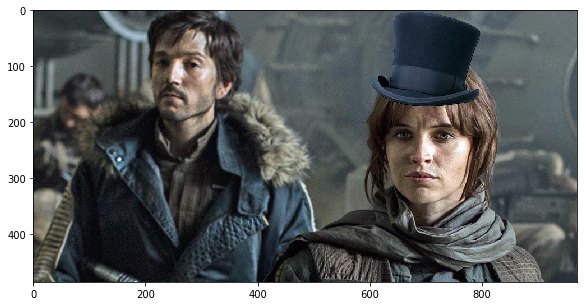

In [8]:
# let's make it bigger to we can see it in all of its glory!!
pylab.rcParams['figure.figsize'] = (10.0, 5.0)
plt.imshow(pic);

# Exercises

- Go back through this lesson and play with the OpenCV functions
- Grab some new images from the internet, selfies, or your friends (you do have some?) and play with those images
- Try to grab images from the camera in your laptop and save it to an MPEG4 file, post it or email to someone ... nothing inappropriate

# Questions

1. How does OpenCV store the color planes for a color image (i.e., in what order)?
1. What are the pro's/con's for RGB and HSV color spaces
1. How do you convert a color image to gray scale using OpenCV?
1. Given an image, how would I determine if it was a grayscale (1 plane) or color image (3 planes)?
1. Using only 1 command, how do I load a color image (say `bob.jpeg`) as a gray scale image?
1. What are affine transforms?
1. Given an image that is 300x300 pixels in size, how would you crop out everything but the center 100 pixels (i.e., range 100-200) and assign it to a new image?
1. Fill out the following for an HSV image:

| Plane      | Range | Description |
|------------|---|---|
| Hue        |   |   |
| Value      |   |   |
| Saturation |   |   |


-----------

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.